# Taylor Imhof
# Bellevue University | DSC 550
# Final Project Milestone #3
# 2/25/2022

## Work For Milestone #1

## Load Required Libraries

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# supress notebook warnings
import warnings
warnings.filterwarnings('ignore')

## Read CSV Data Into Pandas Dataframe

In [2]:
# read in data
data = pd.read_csv('data/marketing_data.csv')
data.head()

ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00         0   
1      1        1961  Graduation         Single  $57,091.00         0   
2  10476        1958  Graduation        Married  $67,267.00         0   
3   1386        1967  Graduation       Together  $32,474.00         1   
4   5371        1989  Graduation         Single  $21,474.00         1   

   Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0         0     6/16/14        0       189  ...                  6   
1         0     6/15/14        0       464  ...                  7   
2         1     5/13/14        0       134  ...                  5   
3         1     5/11/14        0        10  ...                  2   
4         0      4/8/14        0         6  ...                  2   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  1             0             0             0             0   
1                  5             0             0             0             0   
2                  2             0             0             0             0   
3                  7             0             0             0             0   
4                  7             1             0             0             0   

   AcceptedCmp2  Response  Complain  Country  
0             0         1         0       SP  
1             1         1         0       CA  
2             0         0         0       US  
3             0         0         0      AUS  
4             0         1         0       SP  

[5 rows x 28 columns]

In [3]:
# check dimensions of data set
data.shape

(2240, 28)

In [4]:
# display data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

This dataset contains 2240 records with 28 columns in total. After reviewing the Dtype column produced from info(), I noticed that income was encoded as a string and had some additional whitespace in the column name.

## Cleaning Income Column

In [5]:
# rename income column to remove extra whitespace
data.rename({" Income ": "Income"}, axis=1, inplace=True)

# to check that changes were put into effect
data.columns 

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [6]:
## utility function to clean string formatted currency to float by removing commas and dollar signs
def clean_currency(dollars):
    """
    args: string containing dollar sign and comma characters
    returns: 
    """
    if isinstance(dollars, str):
        return(dollars.replace('$', '').replace(',', ''))
    return(dollars)

In [7]:
# create copy
clean_income = data.copy()

# apply clean currency utilty function to income column
clean_income['Income'] = clean_income['Income'].apply(clean_currency).astype(float)

# check dtype to ensure changes were put into effect
clean_income['Income'].dtype

dtype('float64')

## Graphical Analysis Of `Income` Column

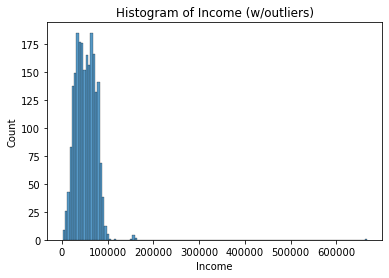

In [8]:
# display histogram of income distribution
sns.histplot(data=clean_income['Income'])
plt.title('Histogram of Income (w/outliers)')
plt.show()

There looks like there are a few outliers in the income column. In order to get a better look at potential outliers, I decided to graph a boxplot of the income column.

Text(0.5, 1.0, 'Boxplot of Income Column')

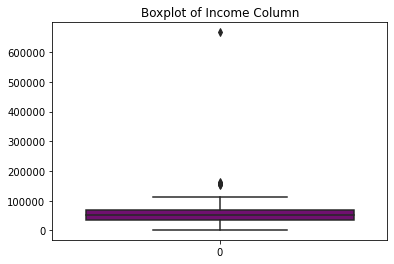

In [9]:
# create boxplot of income column
sns.boxplot(data=clean_income['Income'], color='purple')
plt.title('Boxplot of Income Column')

It looks like there is one very anomalous outlier at > 600000, so I decided to filter down the rows to customers with income below 200000.

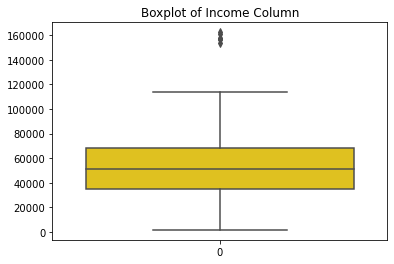

In [10]:
# create copy
filter_income = clean_income.copy()

# filter income to values below 200000
filter_income = filter_income[filter_income['Income'] < 200000]

# display new boxplot to see if more filtering might be necessary
sns.boxplot(data=filter_income['Income'], color='gold')
plt.title('Boxplot of Income Column')
plt.show()

After reviewing this boxplot it looks like while there are still a few outliers, I felt that they were close enough to the "norm" to be acceptable observation values.

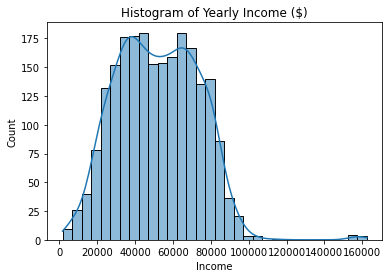

In [11]:
# create histogram of cleaned and filtered income column
sns.histplot(data=filter_income['Income'], kde=True)
plt.title('Histogram of Yearly Income ($)')
plt.show()

## Graphical Analysis Of `Year_Birth` Column

Another column of data that I wanted to get a better feel for how it was distributed was the column noting each customer's birth year.

In [12]:
filter_income.shape

(2215, 28)

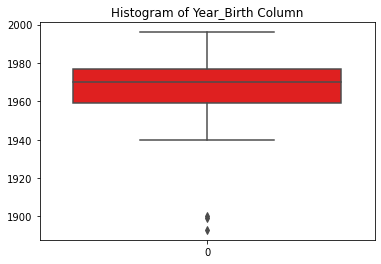

In [13]:
# identify potential outliers with boxplot
sns.boxplot(data=filter_income['Year_Birth'], color='red')
plt.title('Histogram of Year_Birth Column')
plt.show()

It looks like there are a few outliers, so I decided to filter the data for customer's who were born after 1920.

In [14]:
# create copy
filter_birth = filter_income.copy()

# filter customers born after 1920
filter_birth = filter_birth[filter_birth['Year_Birth'] > 1920]
filter_birth.shape

(2212, 28)

After filtering by birth year, only three observations were lost.

Text(0.5, 1.0, 'Histogram of Year_Birth Distriubtion')

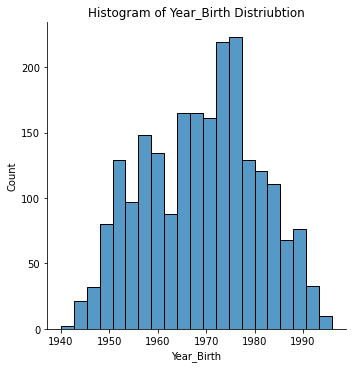

In [15]:
# plot histogram of birth year column
sns.displot(data=filter_birth, x='Year_Birth')
plt.title('Histogram of Year_Birth Distriubtion')

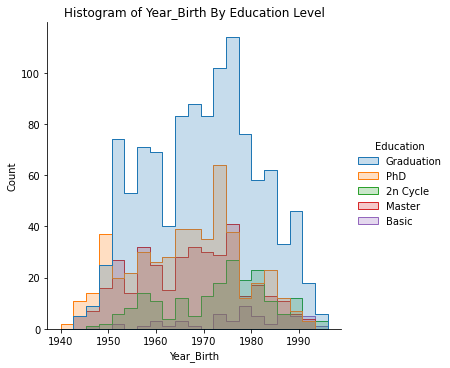

In [16]:
# displot filtered by level of education 
sns.displot(data=filter_birth, x='Year_Birth', hue='Education', element='step')
plt.title('Histogram of Year_Birth By Education Level')
plt.show()

I decided to add an additional `hue` parameter so that I could see how the distributions of the customer's birth year varied by their respective education level.

Observations: The bulk of the customer's contained in this dataset were born in the mid-70's. It looks like the ages of the customers (today) range from about 28 - 80 years old. When I added the `hue` parameter to filter by education level, I could see that most of the customer's have graduated from college, while a decent amount of the older folks (born before 1970) have received their Ph.D. I felt that was pretty interesting!

## Graphical Analysis of `Education` Column

While I was able to make some general conclusions about how many customers belonged to each of the different levels of education, I felt that reviewing a bar chart of the education level column would provide more evident insights.

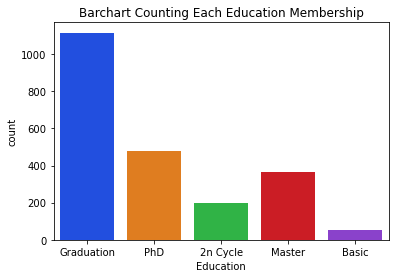

In [17]:
# create bar chart of education column
sns.countplot(x=filter_birth['Education'], palette='bright')
plt.title('Barchart Counting Each Education Membership')
plt.show()

Observations: Again, it would appear that the bulk of the customers in the dataset have received their college degrees. I found it interesting that the count of Ph.D. holders was greater than those with Master's degrees. I wasn't exactly sure what '2n cycle education' meant, but after looking into it a bit, it would seem to mean that the customer is currently pursuing their Master's (perhaps this is more popular in different countries?)

## Graphical Analysis of Country Column

The last column that I wanted to get a feel for before diving into the data transformation stage was the country column. I was curious to see the different countries that were included in this dataset, as well as how many customers belonged to each country. I felt the best approach to seeing this visually would be accomplished by a piechart.

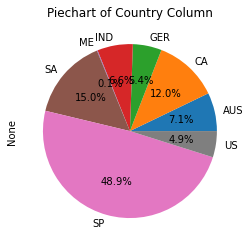

In [18]:
# display pie chart of country value membership
data.groupby('Country').size().plot(kind='pie', autopct='%1.1f%%')
plt.title('Piechart of Country Column')
plt.show()

After reviewing this piechart, there are quite a few countries included in this dataset. Nearly half of the customers are from Spain (I am guessing that the professor that created this dataset is Spanish), while the next largest country participating in the dataset is Saudi Arabia, followed by Canada, Australia, and the US. This visualization was quite useful, as it helped me identify potential new columns to create/combine or drop altogether. For example, the percentage of customers from ME (I believe this is Montenegro?) is only 0.1% so customers from there could be dropped without much impact. Also, I might be able to get away with combining Canada and the US into a North America country as we are so similar in culture and location.

## Work For Milestone #2

## Data Preparation

List of opeartions to consider:
 - drop features that are not useful for model buildling
 - perform data extraction/selection
 - transform features
 - engineer new useful features
 - handle missing data (explain reasoning)
 - create dummy variables if necessary

In [19]:
# create copy of df for milestone 2 work
df2 = filter_birth.copy()

In [20]:
# check info for dtypes and dimensions
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2212 non-null   int64  
 1   Year_Birth           2212 non-null   int64  
 2   Education            2212 non-null   object 
 3   Marital_Status       2212 non-null   object 
 4   Income               2212 non-null   float64
 5   Kidhome              2212 non-null   int64  
 6   Teenhome             2212 non-null   int64  
 7   Dt_Customer          2212 non-null   object 
 8   Recency              2212 non-null   int64  
 9   MntWines             2212 non-null   int64  
 10  MntFruits            2212 non-null   int64  
 11  MntMeatProducts      2212 non-null   int64  
 12  MntFishProducts      2212 non-null   int64  
 13  MntSweetProducts     2212 non-null   int64  
 14  MntGoldProds         2212 non-null   int64  
 15  NumDealsPurchases    2212 non-null   i

## Handle Missing Data

In [21]:
# check count of null values for each column
df2.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

In [22]:
# check for duplicate data
df2.duplicated().value_counts()

False    2212
dtype: int64

There do not appear to be ANY missing or duplicate values

## Data Transformations

#### `Income` Column

As performed in the work for milestone 1, the `Income` column required a little bit of cleaning before I was able to create visualizations. To recap, I had to strip the dollar signs and commas from each string dollar amount. Then, I casted each string value to the float data type. To see the full details on how I transformed the income column, please refer to the early work above in this Notebook.

#### `Dt_Customer` Column

The values under the column `Dt_Customer` were enocded as strings. In order to analyze these values, it was necessary to convert them to the datetime format.

In [23]:
# convert string values for dt_customer column to datetime format
df2['Dt_Customer'] = pd.to_datetime(df2['Dt_Customer'])

# check dtype to ensure changes were implemented
df2['Dt_Customer'].dtype

dtype('<M8[ns]')

## Creating New Features

#### Combining `Kidhome` and `Teenhome` Columns

After doing some initial EDA and exploring basic visualizations, there were quite a few columns that I felt could be consolidated into single columns. The first of which were the two columns the measured the amount of kids and teens in the house. I felt it would be intuitive to combine these into one column `children_at_home`, as the age of the child does not matter as much; if they are living at the household, it is safe to assume they are dependent on the adult (customer).

In [24]:
# combine kidhome and teenhome columns into new column
df2['children_at_home'] = df2['Kidhome'] + df2['Teenhome']

# check three columns to see if they were added correctly
df2[['Kidhome', 'Teenhome', 'children_at_home']].head()

Kidhome  Teenhome  children_at_home
0        0         0                 0
1        0         0                 0
2        0         1                 1
3        1         1                 2
4        1         0                 1

I could verify that they values for each column were added correctly to the new column, as the values for idx 3 were both 1 for kidhome and teenhome, and the added column children_at_home was 2.

#### Combining All Expenditures and Purchases

There were a few columns that I felt could be combined to create a variable to get a total picture of the data. These included columns relating to expenditures and purchases. I decided to create two new columns (`total_expenditures` and `total_purchases`).

In [25]:
# create new total_expenditures column to add all money spent on various products (fish, wine, sweets, etc)
df2['total_expenditures'] = df2['MntFishProducts'] + df2['MntWines'] + df2['MntFruits'] + df2['MntMeatProducts'] + df2['MntGoldProds']

# create new total_purchases column to add all count of types of purchses (deals, web, store, and catalog)
df2['total_purchases'] = df2['NumDealsPurchases'] + df2['NumWebPurchases'] + df2['NumStorePurchases'] + df2['NumCatalogPurchases']

# check columns to see that they were created successfully
df2[['total_expenditures', 'total_purchases']].head()

total_expenditures  total_purchases
0                1001               15
1                 577               18
2                 249               11
3                  11                4
4                  91                8

#### Creating New Current Age Column

I felt it would be pretty useful to have a column that contained the current age of each of the customer's. For this, all I had to do was subtract todays current year from the year they were born (extracted for `Year_Birth` columns). While there might be some error as it is still early in 2022, I felt that it would not have a significant impact on my results.

In [26]:
# create new age column based on current year and year recorded for each customer's date of birth
df2['age'] = datetime.datetime.now().year - df2['Year_Birth']

#### Renaming Education Values

In order to better understand for myself the values associated with the customer's education levels, I went ahead and changed them to values more recognizable in the US. The main change was setting values of `2n cycle` to `Master`, as well as `Basic` to `Highschool`.

In [27]:
# create dict of values to change
ed_changes = {'Graduation':'Undergraduate', '2n Cycle':'Master', 'PhD':'PhD', 'Basic':'Highschool', 'Master':'Master'}

# apply changes via mapping function to new column for education level
df2['education_level'] = df2['Education'].map(ed_changes, na_action='ignore')

# check value counts of new column to see reflected changed
df2['education_level'].value_counts()

Undergraduate    1115
Master            563
PhD               480
Highschool         54
Name: education_level, dtype: int64

#### Refining Values in Marital Status

After taking a look at the value counts for the column `martial_status`, I found there were some (hilarious) anomalous values such as YOLO and Absurd. I felt that these values served no purpose, so I filtered them out of my dataframe.

In [28]:
# filter marital status column to contain only valid statuses
df2 = df2[(df2['Marital_Status'] == 'Married') | (df2['Marital_Status']=='Divorced') | (df2['Marital_Status']=='Single') |
                           (df2['Marital_Status']=='Widow')]

In [29]:
df2['Marital_Status'].value_counts()

Married     857
Single      470
Divorced    231
Widow        76
Name: Marital_Status, dtype: int64

#### Drop Useless Or Redundant Features

In [30]:
list(df2.columns)

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response',
 'Complain',
 'Country',
 'children_at_home',
 'total_expenditures',
 'total_purchases',
 'age',
 'education_level']

The `ID` column contained in this dataset serves no purpose for analysis and I felt it could be dropped safely. After creating a new `education_level` column, the original `Education` column was redundant and could be dropped from the dateframe. Since I created an `age` column from the `Year_Birth` column, it could also be dropped safely. I combined `Teenhome` and `Kidhome` into one column, so those two could be dropped safely.

In [31]:
df3 = df2.drop(['ID', 'Education', 'Year_Birth', 'Kidhome', 'Teenhome', 'Dt_Customer'], axis=1)
df3.head()

Marital_Status   Income  Recency  MntWines  MntFruits  MntMeatProducts  \
0       Divorced  84835.0        0       189        104              379   
1         Single  57091.0        0       464          5               64   
2        Married  67267.0        0       134         11               59   
4         Single  21474.0        0         6         16               24   
5         Single  71691.0        0       336        130              411   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  ...  \
0              111               189           218                  1  ...   
1                7                 0            37                  1  ...   
2               15                 2            30                  1  ...   
4               11                 0            34                  2  ...   
5              240                32            43                  1  ...   

   AcceptedCmp1  AcceptedCmp2  Response  Complain  Country  children_at_home  \
0             0             0         1         0       SP                 0   
1             0             1         1         0       CA                 0   
2             0             0         0         0       US                 1   
4             0             0         1         0       SP                 1   
5             0             0         1         0       SP                 0   

   total_expenditures  total_purchases  age  education_level  
0                1001               15   52    Undergraduate  
1                 577               18   61    Undergraduate  
2                 249               11   64    Undergraduate  
4                  91                8   33    Undergraduate  
5                1160               17   64              PhD  

[5 rows x 27 columns]

#### Renaming Columns For Consistency

This has more to do with personal preference, but I went ahead a renamed the columns so that they were consistent in their case and format. I have gotten into the habit of making all of my column names lowercase. Also, if they contain more than one more, I separate each word with an underscore.

In [32]:
# rename columns for consistency
df3.rename({'Marital_Status':'marital_status',
     'Income':'income',
     'Dt_Customer':'dt_customer',
     'Recency':'recency',
     'MntWines':'mnt_wines',
     'MntFruits':'mnt_fruits',
     'MntMeatProducts':'mnt_meat_products',
     'MntFishProducts':'mnt_fish_products',
     'MntSweetProducts':'mnt_sweet_products',
     'MntGoldProds':'mnt_gold_products',
     'NumDealsPurchases':'num_deals_purchases',
     'NumWebPurchases':'num_web_purchases',
     'NumCatalogPurchases':'num_catalog_purchases',
     'NumStorePurchases':'num_store_purchases',
     'AcceptedCmd3':'accepted_cmp_3',
     'AcceptedCmd4':'accepted_cmp_4',
     'AcceptedCmd5':'accepted_cmp_5',
     'AcceptedCmd1':'accepted_cmp_1',
     'AcceptedCmd2':'accepted_cmp_2',
     'Response':'response',
     'Complain':'complain',
     'Country':'country',}, axis=1, inplace=True)
df3.head()

marital_status   income  recency  mnt_wines  mnt_fruits  mnt_meat_products  \
0       Divorced  84835.0        0        189         104                379   
1         Single  57091.0        0        464           5                 64   
2        Married  67267.0        0        134          11                 59   
4         Single  21474.0        0          6          16                 24   
5         Single  71691.0        0        336         130                411   

   mnt_fish_products  mnt_sweet_products  mnt_gold_products  \
0                111                 189                218   
1                  7                   0                 37   
2                 15                   2                 30   
4                 11                   0                 34   
5                240                  32                 43   

   num_deals_purchases  ...  AcceptedCmp1  AcceptedCmp2  response  complain  \
0                    1  ...             0             0         1         0   
1                    1  ...             0             1         1         0   
2                    1  ...             0             0         0         0   
4                    2  ...             0             0         1         0   
5                    1  ...             0             0         1         0   

   country  children_at_home  total_expenditures  total_purchases  age  \
0       SP                 0                1001               15   52   
1       CA                 0                 577               18   61   
2       US                 1                 249               11   64   
4       SP                 1                  91                8   33   
5       SP                 0                1160               17   64   

   education_level  
0    Undergraduate  
1    Undergraduate  
2    Undergraduate  
4    Undergraduate  
5              PhD  

[5 rows x 27 columns]

#### Create Dummy Variables For Categorical Features

In [33]:
# create subset df of only categorical features
categorical_feautres_df = df3.select_dtypes(exclude='number')

# create new df to append dummy features
dummy_df = pd.DataFrame()

# iterate across each column and create new dummy value per feature
for column in categorical_feautres_df.columns:
    dummy_value = pd.get_dummies(categorical_feautres_df[column], prefix=column)
    # add new features to empty dummy dataframe
    dummy_df = pd.concat([dummy_df, dummy_value], axis=1)

# merge new dummy features to full dataframe
df4 = df3.copy()
df4 = pd.concat([df4, dummy_df], axis=1)
df4.drop(categorical_feautres_df.columns, axis=1, inplace=True)

In [34]:
# view new df with appended dummy features
df4.head()

income  recency  mnt_wines  mnt_fruits  mnt_meat_products  \
0  84835.0        0        189         104                379   
1  57091.0        0        464           5                 64   
2  67267.0        0        134          11                 59   
4  21474.0        0          6          16                 24   
5  71691.0        0        336         130                411   

   mnt_fish_products  mnt_sweet_products  mnt_gold_products  \
0                111                 189                218   
1                  7                   0                 37   
2                 15                   2                 30   
4                 11                   0                 34   
5                240                  32                 43   

   num_deals_purchases  num_web_purchases  ...  country_GER  country_IND  \
0                    1                  4  ...            0            0   
1                    1                  7  ...            0            0   
2                    1                  3  ...            0            0   
4                    2                  3  ...            0            0   
5                    1                  4  ...            0            0   

   country_ME  country_SA  country_SP  country_US  education_level_Highschool  \
0           0           0           1           0                           0   
1           0           0           0           0                           0   
2           0           0           0           1                           0   
4           0           0           1           0                           0   
5           0           0           1           0                           0   

   education_level_Master  education_level_PhD  education_level_Undergraduate  
0                       0                    0                              1  
1                       0                    0                              1  
2                       0                    0                              1  
4                       0                    0                              1  
5                       0                    1                              0  

[5 rows x 40 columns]

In [35]:
# compare df shapes to see how many additional columns/features were added after creating dummy variables
print('Without Dummy', df3.shape)
print('With Dummy', df4.shape)

Without Dummy (1634, 27)
With Dummy (1634, 40)


Creating dummy variables created `13` additional columns

## Work For Milestone 3

## Model Building And Evaluation

#### Create Correlation Matrix To Identify Data Trends

Before creating any models, I felt it would be helpful to first review the correlation matrix of the data in order if I could identify any strong relationships to point me in the right direction for model selection.

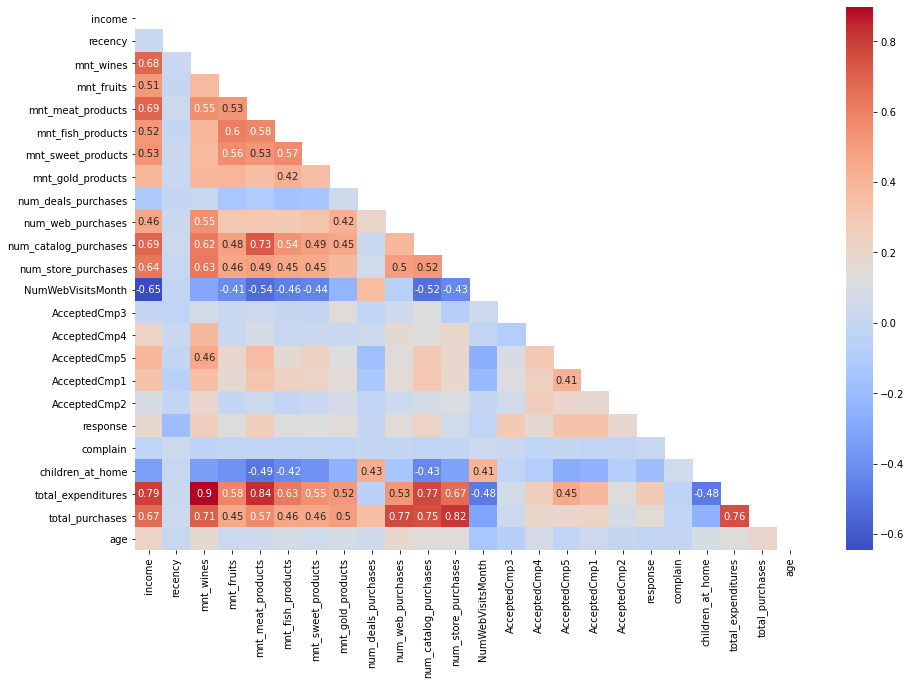

In [36]:
# display correlation matrix to id underlying data trends
plt.figure(figsize=(15,10))

# use df3 as to not involve dummy vars created in previous step
corr_matx = df3.corr()

# get upper triangle of correlation matrix
upper_tri = np.triu(corr_matx)

# display seaborn heatmap of corr matrix
ax = sns.heatmap(corr_matx, annot=True, cmap='coolwarm', mask=upper_tri)

# only display numeric relation if >0.4 or <-0.4
## makes it easier to spot stronger relationships
for t in ax.texts:
    if abs(float(t.get_text())) >=0.4:
        t.set_text(t.get_text())
    else:
        # provide empty string
        t.set_text('')
plt.show()

#### Observations:

There were quite a few strong, positive relationships particularly involving total expenditures and total purchases. This makes sense intuitively, as people who have more total expenditures will have bought more of each type of product (e.g., fruits, wines, meats, etc.). I found it interesting that the type of product with the strongest relationship with total expenditures was wine! Perhaps that is becuase the majority of custeroms were from Spain, and wine very popular in that country.

With regard to strong, negative relationships, I found it interesting that the number of web visits per month is negatively related to the customer's annual income (-.65). Perhaps this is due to people with lower incomes doing more "window-shopping" via the online market pages, while wealthier people can simply go to the markets without much concern of knowing the prices of the products beforehand.

Overall, it looks like there are plenty of potentially interesting trends that I can try to measure using statistical testing and evaluation.

#### Linear Regresion (Sklearn)

In [37]:
# load libraries for model training
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [38]:
# divide data into feature and target dataframes
features = df4.drop(columns='income')
target = df4['income']

# split feature/target dfs into train/test splits
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [39]:
# import linear regression func from sklearn
from sklearn.linear_model import LinearRegression

# create new linear model object
lr_model = LinearRegression(normalize=True)

# fit model to training data
lr_model.fit(x_train, y_train)

# make predictions using newly trained model
y_preds = lr_model.predict(x_test)

In [40]:
# evaluate model using mean squre error
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mean_squared_error(y_test, y_preds))
score = lr_model.score(x_test, y_test)

# display model metrics
print('MSE: {}'.format(round(mse,2)))
print('RMSE: {}'.format(round(rmse,2)))
print('Median Target Value: {}'.format(target.median()))
print('Model Score: {}'.format(round(score,2)))

MSE: 88624259.4
RMSE: 9414.05
Median Target Value: 51400.5
Model Score: 0.79


#### Ordinary Least Squares (Statsmodels)

I decided to train an OLS model just so that I could get used to the operations necessary and see how it compares with creating it via sklearn's LinearRegression object. I also like being able to display all the metrics via the summary() function.

In [41]:
# ordinary least squares
x_test = sm.add_constant(x_test)

# create new ols model object
ols_model = sm.OLS(y_test, x_test).fit()
preds = ols_model.predict(x_test)

# display model summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     38.06
Date:                Thu, 03 Mar 2022   Prob (F-statistic):           1.00e-87
Time:                        11:18:55   Log-Likelihood:                -3435.9
No. Observations:                 327   AIC:                             6942.
Df Residuals:                     292   BIC:                             7075.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

#### Analyze OLS Model P-values

Text(0.5, 1.0, 'OLS Model Sorted P-values')

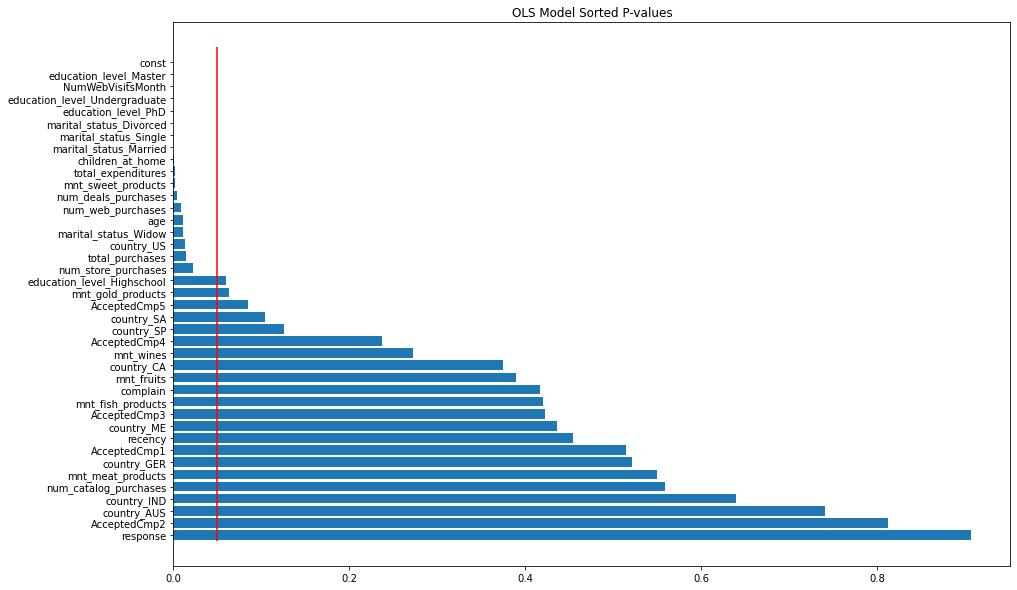

In [42]:
## create plot to visualize p-values and determine best parameters
plt.figure(figsize=(15,10))

# create struct of p-values sorted in descending order
p_values = pd.Series(ols_model.pvalues).sort_values(ascending=False)

# plot sorted p-values to identify features with strongest predictive power
plt.barh(y=p_values.index, width=p_values)

# display vlines to designate vertical cut-off line
plt.vlines(x=0.05, ymin=-0.5, ymax=40.25, colors='red')

# give plot a title
plt.title('OLS Model Sorted P-values')

Using the vline as a cutoff, there are quite a few parameters that had low p-value (<0.05). There were also quite a few with rather high p-values, and should be removed from model training so that they do not negatively impact predictive power.

#### Refined Linear Regression Model Creation With Strongest Parameters

In [51]:
# filter predictive features by p-values <.05
# get index to use as column selector for dataframe
predictive_features = p_values[p_values < .05].drop('const').index

# create train test split on new refined selective features
x_train, x_test, y_train, y_test = train_test_split(features[predictive_features],
                                                   target,
                                                   test_size=0.2,
                                                   random_state=1)

In [44]:
# recreate new linear model object
lr_model = LinearRegression(normalize=True)

# fit model to training data
lr_model.fit(x_train, y_train)

# make predictions using newly trained model
y_preds = lr_model.predict(x_test)

In [45]:
# evaluate model using mean squre error
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mean_squared_error(y_test, y_preds))
score = lr_model.score(x_test, y_test)

# display model metrics
print('MSE: {}'.format(round(mse,2)))
print('RMSE: {}'.format(round(rmse,2)))
print('Median Target Value: {}'.format(target.median()))
print('Model Score: {}'.format(round(score,2)))

MSE: 98187963.67
RMSE: 9908.98
Median Target Value: 51400.5
Model Score: 0.8


Observations: After passing the "best" parameters, there did not appear to be any significant change to overall score (<.01 change).

#### Predicting Campaign Success (Response Target)

I decided to go ahead and try a different model with a different target. The `response` column measured whether the customer had accepted the most recent campaign offer, so I thought this would be an interesting classification target to base a logistic regression model around. Before creating the logistic model, I had to re-iterate through the steps of breaking up my data into features and target dataframes. I also had to redo the train/test split.

In [46]:
# load logistic regression model library
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
# recreate train/test data for new target column response
features = df4.drop(columns='response')
target = df4['response']

# split into train test sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=.2, random_state=1)

# display shapes of train/test splits to ensure same dimensions
print('x_train rows:\t{}'.format(x_train.shape[0]))
print('y_train rows:\t{}'.format(y_train.shape[0]))
print('x_test rows:\t{}'.format(x_test.shape[0]))
print('y_test rows:\t{}'.format(y_test.shape[0]))

x_train rows:	1307
y_train rows:	1307
x_test rows:	327
y_test rows:	327


#### Training the Logistic Model

In [48]:
# create new logistic model object
log_model = LogisticRegression(random_state=1)

# fit training data to linear model object
log_model.fit(x_train, y_train)

# display logistic training score
log_model_score = round(log_model.score(x_train, y_train),3)
print('Logistic Model Score:', log_model_score)

Logistic Model Score: 0.839


#### Logisitc Model Confusion Matrix

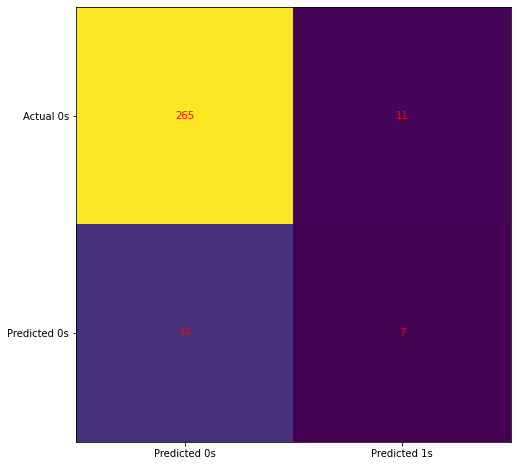

In [49]:
# display confusion matrix of logistic model results
cm = confusion_matrix(y_test, log_model.predict(x_test))

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Predicted 0s'))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center', color='red')
plt.show()

#### Logistic Model Report

In [50]:
# display classification report for logistic model
print(classification_report(y_test, log_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       276
           1       0.39      0.14      0.20        51

    accuracy                           0.83       327
   macro avg       0.62      0.55      0.55       327
weighted avg       0.78      0.83      0.80       327



Observations: The logistic model actually performed quite well in predicted the training labels, with an overall precision score for 0 values (i.e., customer did NOT accept advertisement campaign offer). However, since there were only a total of 11 customers who accepted the offer (i.e., repsonse value) I do not belive there was enough data points to train the model to predict whether a customer would accept the campaign offer.